Using device  cpu
Epoches : 1/5 || Loss : 318.7221
Epoches : 2/5 || Loss : 134.8181
Epoches : 3/5 || Loss : 90.9792
Epoches : 4/5 || Loss : 67.1304
Epoches : 5/5 || Loss : 53.2509
Total Accuracy : 97.49%
Model Saved as mnist_model.pth


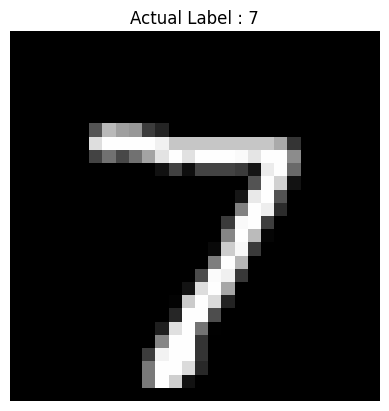

User Picked Image Index  0
Actual Label  7
Model Prediction  7


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device ", device)

transform = transforms.ToTensor()

train_data = MNIST(
    root="data",
    train=True,
    download=True,
    transform=transform
)

test_data = MNIST(
    root="data",
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

class DigitModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.net(x)

model = DigitModel().to(device)

loss_fn = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters(), lr=0.001)

epochs = 5

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for images, labels in train_loader:
        images = images.view(images.size(0), -1).to(device)
        labels = labels.to(device)

        optimiser.zero_grad()
        outputs = model(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimiser.step()

        total_loss += loss.item()

    print(f"Epoches : {epoch + 1}/{epochs} || Loss : {total_loss:.4f}")

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.size(0), -1).to(device)
        labels = labels.to(device)

        outputs = model(images)
        prediction = outputs.argmax(dim=1)

        correct += (prediction == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f"Total Accuracy : {accuracy:.2f}%")

torch.save(model.state_dict(), "mnist_model.pth")
print("Model Saved as mnist_model.pth")

index = 0
image, true_label = test_data[index]

plt.imshow(image.squeeze(), cmap="gray")
plt.title(f"Actual Label : {true_label}")
plt.axis("off")
plt.show()

image_flat = image.view(1, -1).to(device)

with torch.no_grad():
    output = model(image_flat)
    predicted_label = output.argmax(dim=1).item()

print("User Picked Image Index ", index)
print("Actual Label ", true_label)
print("Model Prediction ", predicted_label)
